In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("Libraries Imported Successfully!")

Libraries Imported Successfully!


In [6]:
df = pd.read_csv("/content/bank-full.csv", sep=";")

print("Dataset Shape:", df.shape)
df.head()


Dataset Shape: (45211, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [8]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


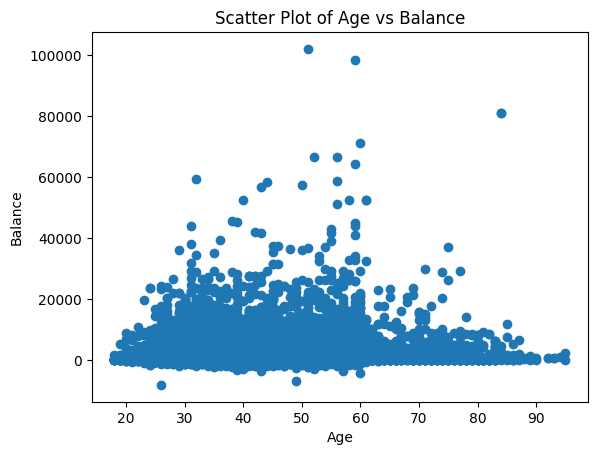

In [9]:
plt.figure()
plt.scatter(df["age"], df["balance"])
plt.xlabel("Age")
plt.ylabel("Balance")
plt.title("Scatter Plot of Age vs Balance")
plt.show()

Handle Missing Values

In [10]:
# Numerical columns
num_cols = df.select_dtypes(include=["int64", "float64"]).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Categorical columns
cat_cols = df.select_dtypes(include=["object"]).columns
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])


Encode Categorical Variables (One-Hot Encoding)

In [15]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False, drop="first")
encoded_data = encoder.fit_transform(df[cat_cols])

encoded_df = pd.DataFrame(
    encoded_data,
    columns=encoder.get_feature_names_out(cat_cols)
)

# Combine with numerical data
df_processed = pd.concat(
    [df[num_cols].reset_index(drop=True),
     encoded_df.reset_index(drop=True)],
    axis=1
)


Normalize Numerical Features

(Standardization: mean = 0, std = 1)

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_processed[num_cols] = scaler.fit_transform(df_processed[num_cols])


In [17]:
summary_stats = df[num_cols].agg(["mean", "median", "std"])
summary_stats


,age,balance,day,duration,campaign,pdays,previous
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
median,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441


Define Features & Target

In [18]:
X = df.drop("y", axis=1)
y = df["y"].map({"yes": 1, "no": 0})


Encode Categorical Features

In [19]:
from sklearn.preprocessing import OneHotEncoder

cat_cols = X.select_dtypes(include=["object"]).columns
num_cols = X.select_dtypes(include=["int64", "float64"]).columns

encoder = OneHotEncoder(drop="first", sparse_output=False)
X_cat = encoder.fit_transform(X[cat_cols])

X_cat_df = pd.DataFrame(
    X_cat,
    columns=encoder.get_feature_names_out(cat_cols)
)


Normalize Numerical Features

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_num = scaler.fit_transform(X[num_cols])

X_num_df = pd.DataFrame(X_num, columns=num_cols)


Combine Features

In [21]:
X_processed = pd.concat(
    [X_num_df.reset_index(drop=True),
     X_cat_df.reset_index(drop=True)],
    axis=1
)


Train-Test Split (80% / 20%)

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y,
    test_size=0.2,
    random_state=42
)


Train Logistic Regression Model

In [23]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

Model Evaluation

In [24]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))


Accuracy: 0.8989273471193188
              precision    recall  f1-score   support

           0       0.92      0.98      0.94      7952
           1       0.65      0.34      0.45      1091

    accuracy                           0.90      9043
   macro avg       0.79      0.66      0.70      9043
weighted avg       0.88      0.90      0.88      9043



Confusion Matrix Visualization

<Figure size 640x480 with 0 Axes>

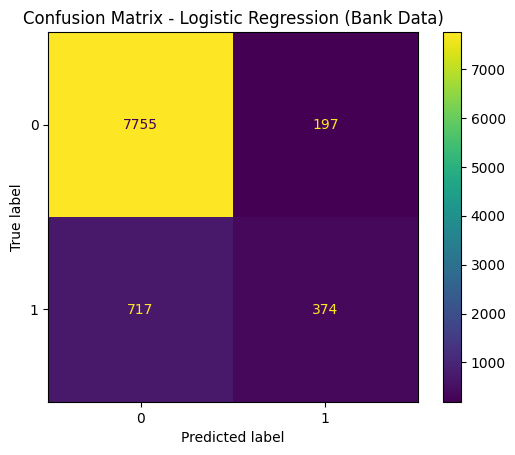

In [25]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


cm = confusion_matrix(y_test, y_pred)

plt.figure()
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix - Logistic Regression (Bank Data)")
plt.show()


Confusion Matrix Values

TN: 7755

FP: 197

FN: 717

TP: 374